                                   Insurance Claim Fraud Detection
Project Description:-
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables
months_as_customer: Number of months of patronage
age: the length of time a customer has lived or a thing has existed
policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
policy_csl: is basically Combined Single Limit
policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
insured_zip: It is the zip code where the insurance was made
insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
insured_education_level: This refers to the Level of education of the customer
insured_occupation: This refers Occupation of the customer
insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
capital-gains: This refers to profit accrued due to insurance premium
capital-loss: This refers to the losses incurred due to insurance claims
incident_date: This refers to the date which claims where made by customers
incident_type: This refers to the type of claim/vehicle damage made by customer
collision_type: This refers to the area of damage on the vehicle
incident_severity: This refers to the extent/level of damage
authorities_contacted: This refers to the government agencies that were contacted after damage
incident_state: This refers to the state at which the accident happened
incident_city: This refers to the city at which the accident happened
1ncident_location: This refers to the location at which the accident happened
incident_hour_of_the_day: The period of the day which accident took place
number_of_vehicles_involved: This refers to number of vehicles involved the accident
property_damage: This refers to whether property was damaged or not
bodily_injuries: This refers to injuries sustained
witnesses: This refers to the number of witnesses involved
police_report_available: This refers to whether the report on damage was documented or not
total_claim_amount: This refers to the financial implications involved in claims
injury_claim: This refers to physical injuries sustained
property_claim: This refers to property damages during incident
vehicle_claim: This refers to property damages during incident
auto_make: This refers to the make of the vehicle
auto_model: This refers to the model of the vehicle
auto_year: This refers to the year which the vehicle was manufactured
_c39:
fraud_reported

Dataset Link-  
https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv


In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv")
df

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [18]:
df.shape

(999, 39)

In [19]:
df.head(30)

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
5,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
6,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
7,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
8,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N
9,235,42,543610,26-05-2002,OH,100/300,500,1253.12,4000000,462283,...,2,?,87010,7910,15820,63280,Ford,F150,2002,N


In [20]:
df.tail(30)

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
969,213,35,844129,20-09-1990,OH,250/500,500,871.46,0,477938,...,0,YES,74140,13480,6740,53920,Ford,Escape,2007,N
970,79,25,732169,05-11-2000,OH,500/1000,500,1863.04,0,462698,...,1,?,67800,13560,6780,47460,Mercedes,C300,1995,N
971,232,44,221854,03-10-1994,OH,250/500,2000,1181.64,0,454552,...,1,YES,55400,5540,11080,38780,Jeep,Grand Cherokee,2002,Y
972,230,37,776950,11-04-2005,IL,500/1000,1000,1060.74,0,471585,...,3,?,49100,9820,4910,34370,Suburu,Impreza,1996,Y
973,234,41,291006,16-05-1990,IN,100/300,500,951.56,0,455426,...,1,?,98280,15120,7560,75600,Chevrolet,Tahoe,2007,Y
974,240,40,845751,11-09-2004,IN,100/300,500,1533.71,9000000,469856,...,2,?,66550,6050,12100,48400,Ford,Escape,2008,N
975,143,33,889764,30-11-1993,OH,500/1000,1000,1200.09,0,454191,...,2,?,70400,14080,7040,49280,Accura,RSX,2002,N
976,266,42,929306,06-03-2003,IN,100/300,500,1093.83,4000000,468454,...,1,NO,53280,4440,8880,39960,Suburu,Impreza,2015,Y
977,89,32,515457,18-12-1996,IN,250/500,1000,988.93,0,614187,...,3,YES,84590,15380,15380,53830,Dodge,Neon,1999,N
978,229,37,556270,21-02-1995,IN,500/1000,1000,1331.94,0,433974,...,2,YES,54560,9920,9920,34720,Saab,95,2004,N


In [21]:
df.columns.tolist()

['328',
 '48',
 '521585',
 '17-10-2014',
 'OH',
 '250/500',
 '1000',
 '1406.91',
 '0',
 '466132',
 'MALE',
 'MD',
 'craft-repair',
 'sleeping',
 'husband',
 '53300',
 '0.1',
 '25-01-2015',
 'Single Vehicle Collision',
 'Side Collision',
 'Major Damage',
 'Police',
 'SC',
 'Columbus',
 '9935 4th Drive',
 '5',
 '1',
 'YES',
 '1.1',
 '2',
 'YES.1',
 '71610',
 '6510',
 '13020',
 '52080',
 'Saab',
 '92x',
 '2004',
 'Y']

In [22]:
df.isnull()

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df.sum()

328                                                                    203626
48                                                                      38900
521585                                                              545717063
17-10-2014                  27-06-200606-09-200025-05-199006-06-201412-10-...
OH                          INOHILILOHINILILILOHOHOHOHOHINOHINOHININILILIN...
250/500                     250/500100/300250/500500/1000250/500250/500100...
1000                                                                  1135000
1406.91                                                            1254999.24
0                                                                  1101000000
466132                                                              500748356
MALE                        MALEFEMALEFEMALEMALEFEMALEMALEMALEFEMALEMALEFE...
MD                          MDPhDPhDAssociatePhDPhDAssociatePhDPhDMastersH...
craft-repair                machine-op-inspctsalesarmed-forcessa

In [24]:
df.isnull().sum()

328                         0
48                          0
521585                      0
17-10-2014                  0
OH                          0
250/500                     0
1000                        0
1406.91                     0
0                           0
466132                      0
MALE                        0
MD                          0
craft-repair                0
sleeping                    0
husband                     0
53300                       0
0.1                         0
25-01-2015                  0
Single Vehicle Collision    0
Side Collision              0
Major Damage                0
Police                      0
SC                          0
Columbus                    0
9935 4th Drive              0
5                           0
1                           0
YES                         0
1.1                         0
2                           0
YES.1                       0
71610                       0
6510                        0
13020     

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   328                       999 non-null    int64  
 1   48                        999 non-null    int64  
 2   521585                    999 non-null    int64  
 3   17-10-2014                999 non-null    object 
 4   OH                        999 non-null    object 
 5   250/500                   999 non-null    object 
 6   1000                      999 non-null    int64  
 7   1406.91                   999 non-null    float64
 8   0                         999 non-null    int64  
 9   466132                    999 non-null    int64  
 10  MALE                      999 non-null    object 
 11  MD                        999 non-null    object 
 12  craft-repair              999 non-null    object 
 13  sleeping                  999 non-null    object 
 14  husband   

<Axes: >

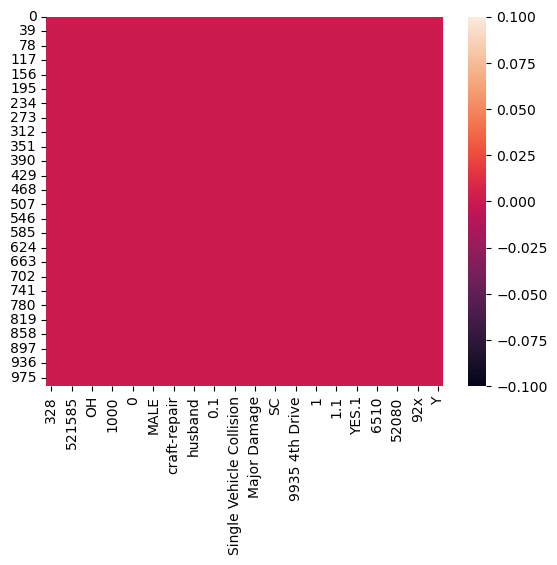

In [26]:
sns.heatmap(df.isnull())

In [ ]:
df = df.drop(columns=['_c39'])

In [ ]:
label_encoders = {}
for col in df.select_dtype(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
X = df.drop(columns=['fraud_reported'])
y = df['fruad_reported'].apply(lambda x: 1 if x == 'Y' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))